In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 16900.csv to 16900.csv


In [ ]:
df = pd.read_csv("16900.csv")

country                  0
adjusted_satisfaction    0
avg_satisfaction         0
std_satisfaction         0
avg_income               0
median_income            0
income_inequality        0
region                   0
happyScore               0
GDP                      0
country.1                0
dtype: int64


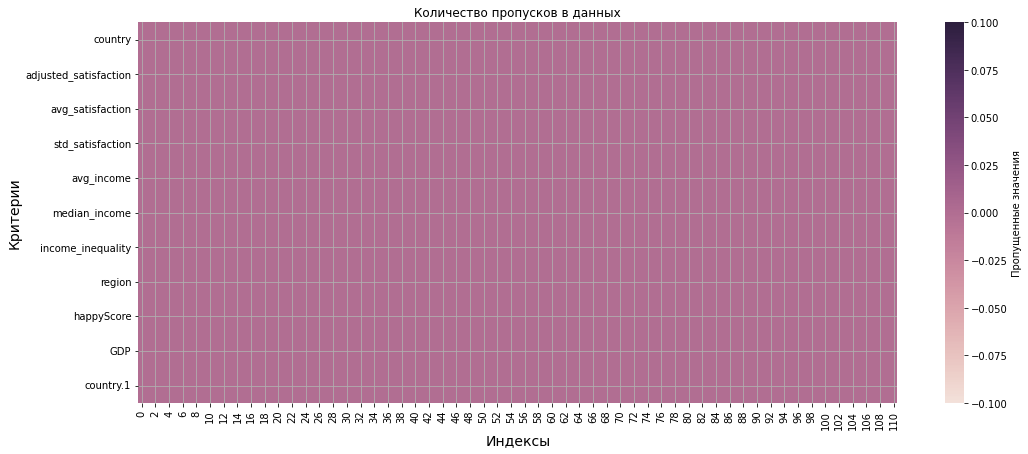

In [ ]:
print(df.isna().sum())
plt.figure(figsize=(17,7))
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.heatmap(df.isna().transpose(), cmap=cmap, cbar_kws={'label': 'Пропущенные значения'})
plt.xlabel("Индексы", fontsize=14)  
plt.ylabel("Критерии", fontsize=14)
plt.title("Количество пропусков в данных")
plt.grid()
plt.show()

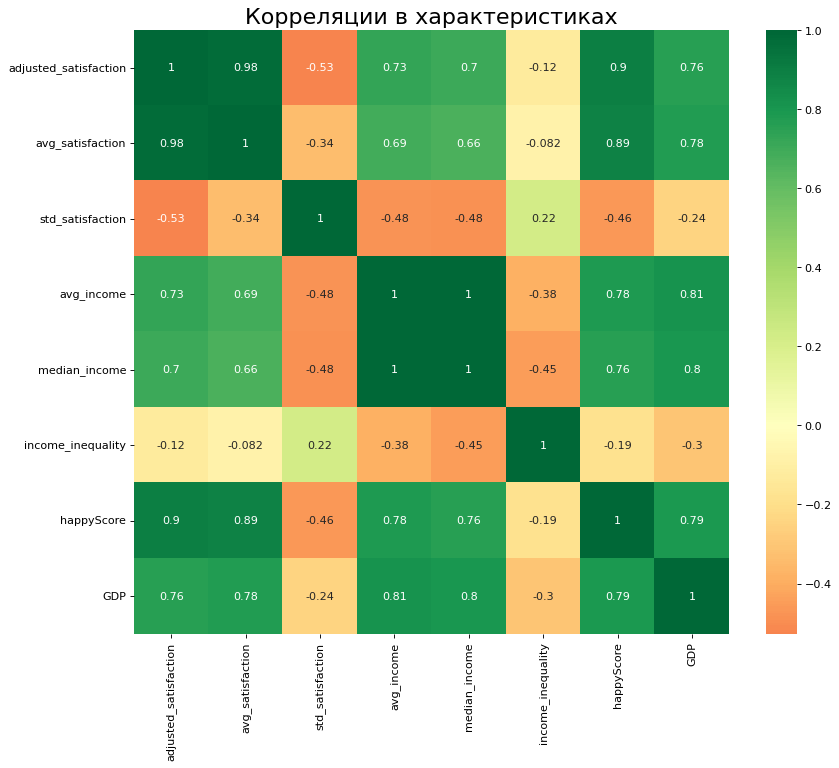

In [ ]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

In [ ]:
y=df['avg_satisfaction']
x=df.drop(['avg_satisfaction','country','country.1','region',], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')
model = LinearRegression()
model.fit(X_train, y_train)
w0 = model.intercept_
w1 = model.coef_
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)
y_pred = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Train dataset size: (77, 7), (77,)
Test dataset size: (34, 7), (34,)
Веса всех признаков (w1):  [ 1.21090985e-01  1.03087333e+00  3.13207729e-05 -3.55910834e-05
 -8.58525301e-04  1.90493997e-04 -4.70973124e-05]
Свободный коэффицент уравнения w0: -2.1462664892714756
Mean Absolute Error: 0.0462770980832517
Mean Squared Error: 0.003121529588101118
R2 score: 0.9979226701108499


In [ ]:
print('Веса всех признаков (w1): ', model.coef_)
print('Свободный коэффицент уравнения w0:', model.intercept_)

Веса всех признаков (w1):  [ 1.21090985e-01  1.03087333e+00  3.13207729e-05 -3.55910834e-05
 -8.58525301e-04  1.90493997e-04 -4.70973124e-05]
Свободный коэффицент уравнения w0: -2.1462664892714756


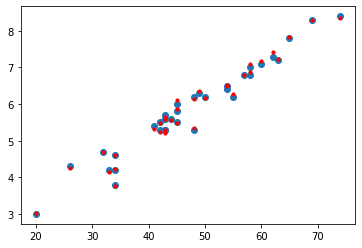

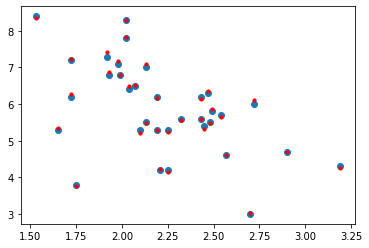

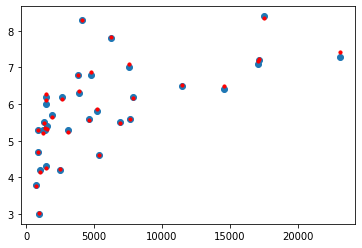

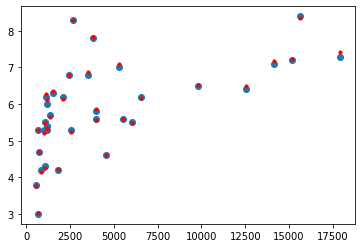

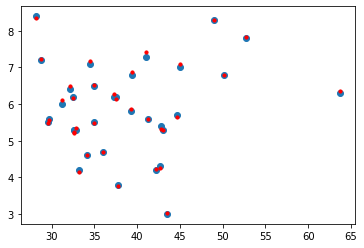

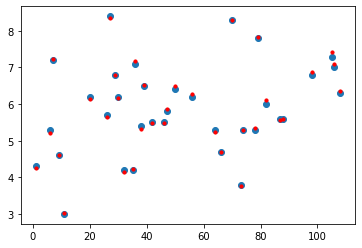

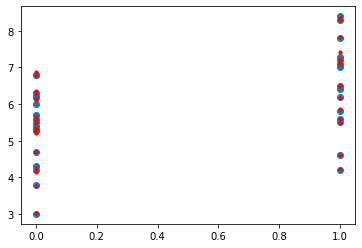

In [ ]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
for col in X_test.columns:
  plt.scatter(X_test[col], y_test)
  plt.scatter(X_test[col], y_pred, color='red', s=10)
  plt.show()

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.0462770980832517
Mean Squared Error: 0.003121529588101118
R2 score: 0.9979226701108499
